<a href="https://colab.research.google.com/github/yimeiwen/CustomerViewingCountCluster/blob/main/Customer_View_Count_Assessment_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Modeling for Viewing Count Case Study


Summary: A cluster model is built for the dataset to classify CTV ads audiences


> Disclaimer: The gender, age and race classifiaction in the project discussed below is for the sole purpose of better understanding the data and providing business insights, I comply with applicable Federal civil rights laws and do not discriminate on the basis of race, color, national origin, age, disability, or sex.



Import library and packages for data processing and plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('ctv_viewing_events.csv')

##Data Interpretation
Gathering Information of the CSV file

In [ ]:
df.head()

,data_date,utc_time,household_id,person_id,gender,age_bucket,demo,race,channel_id,device_type,genre_id,daypart_id
0,11/27/2021,11/28/2021 6:19,38,196,M,50_54,M:50_54,White,2,Fire OS,5,Non_PrimeTime_WE
1,11/30/2021,12/1/2021 2:01,338,3,M,50_54,M:50_54,White,2,Fire OS,3,PrimeTime_WD
2,11/30/2021,12/1/2021 2:42,338,3,M,50_54,M:50_54,White,2,Fire OS,3,PrimeTime_WD
3,12/3/2021,12/3/2021 19:42,142,6,F,25_29,F:25_29,White,2,Fire OS,4,Non_PrimeTime_WD
4,12/9/2021,12/9/2021 18:41,106,110,M,35_39,M:35_39,White,2,Fire OS,3,Non_PrimeTime_WD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89074 entries, 0 to 89073
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_date     89074 non-null  object
 1   utc_time      89074 non-null  object
 2   household_id  89074 non-null  int64 
 3   person_id     89074 non-null  int64 
 4   gender        89074 non-null  object
 5   age_bucket    89074 non-null  object
 6   demo          89074 non-null  object
 7   race          89074 non-null  object
 8   channel_id    89074 non-null  int64 
 9   device_type   89074 non-null  object
 10  genre_id      89074 non-null  int64 
 11  daypart_id    89074 non-null  object
dtypes: int64(4), object(8)
memory usage: 8.2+ MB


In [ ]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
89069     True
89070     True
89071     True
89072     True
89073     True
Length: 89074, dtype: bool

In [ ]:
df2 = df.drop_duplicates(keep='first')

# Q1 asked to display distribution of gender, age_bucket and demo across daypart_id and device. Here is to get some idea of daypart_id, age_bucket, demo and device columns before plotting.

In [ ]:
df2.daypart_id.unique()

array(['Non_PrimeTime_WE', 'PrimeTime_WD', 'Non_PrimeTime_WD',
       'PrimeTime_WE'], dtype=object)

In [ ]:
df2.describe()


,household_id,person_id,channel_id,genre_id
count,37525.000000,37525.000000,37525.0,37525.000000
mean,168.883704,422.882692,2.0,9.337935
std,92.266904,220.236772,0.0,5.870606
min,1.000000,1.000000,2.0,0.000000
25%,101.000000,261.000000,2.0,3.000000
50%,147.000000,443.000000,2.0,7.000000
75%,249.000000,610.000000,2.0,15.000000
max,338.000000,822.000000,2.0,17.000000


In [ ]:
#'age_bucket' column in the original CSV file is not sorted, sort the column first before plotting
df2=df2.dropna()
df2=df2.sort_values(by="age_bucket") 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37525 entries, 10286 to 11099
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_date     37525 non-null  object
 1   utc_time      37525 non-null  object
 2   household_id  37525 non-null  int64 
 3   person_id     37525 non-null  int64 
 4   gender        37525 non-null  object
 5   age_bucket    37525 non-null  object
 6   demo          37525 non-null  object
 7   race          37525 non-null  object
 8   channel_id    37525 non-null  int64 
 9   device_type   37525 non-null  object
 10  genre_id      37525 non-null  int64 
 11  daypart_id    37525 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


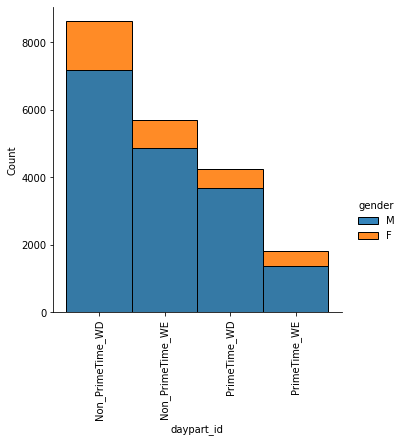

In [ ]:
sns.displot(df2, x="daypart_id", hue='gender', alpha=0.9)
plt.xticks(rotation=90)
plt.show()
# for example, Female audience at Non_PrimeTime_WD is above 8000, while Male audience at Non_PrimeTime_WD is below 8000 Count

#Conclusion from this graph can be: 


---
No matter which daypart_id, it seems there will always be more Female audiences than Male audiences, as Female audiences count bypass Male audiences counts in all 4 different time categories-----if we put ads on CTV platform, we probably will attract more Female buyers than Male buyers assuming they have the same click-conversion rate.
Or we may put more Female targeted ads on CTV, such as ads for cosmetic products





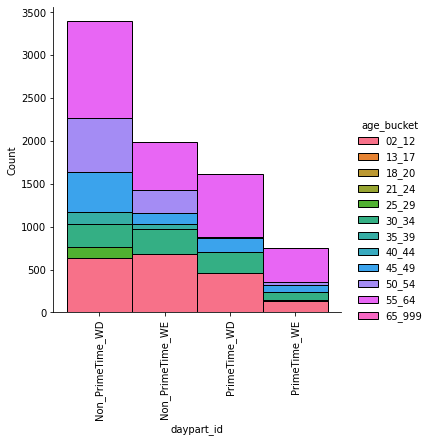

In [ ]:
sns.displot(df2, x="daypart_id", hue='age_bucket',kind='hist', alpha=1)
plt.xticks(rotation=90)
plt.show()

## Conclusion from this graph can be



1.   More people view the ads on Non_PrimeTime_WD > Non_PrimeTime_WE > PrimeTime_WD > PrimeTime_WE, but since WD is weekday(5 days), WE is weekend(2 days). It's also intuitive to say 5 days count added together can be higher than 2 days count added together. Dividing total WD counts over 5 and compare with total WE counts over 2 might be helpful to compare each weekday and weekend. The same rule applies to PrimeTime(assuming it's 3 hours), divide total counts of PrimeTime over 3hours to compare with total NonPrimeTime over 21 hours might be helpful.
2. People age between 55-64 have the most viewing count at all daypart_id




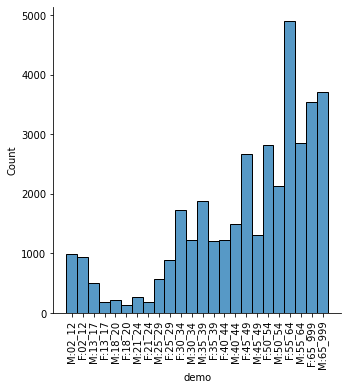

In [ ]:
sns.displot(df2, x="demo")
plt.xticks(rotation=90)
plt.show()

#Conclusion from this graph can be: 


1. People age from 13 to 24 have the least viewing count.

2.  People age above 55 are the largest audience among all viewers.




# Q1 Report the distribution of gender, age_bucket and demo across daypart and device independently using histogram plot:

In [ ]:
dictionary={'Non_PrimeTime_WD':1,'Non_PrimeTime_WE':2,'PrimeTime_WD':3,'PrimeTime_WE':4}
# There are 4 categories in the daypart_id columns, in order to report gender, age_bucket and demo across daypart_id using histogram 
#Ordinal Encoding was used for the 'daypart_id' column, a new column named 'daypart' contains the same informationas 'daypart_id' column is created
#basically using numerical variables instead of categorical variables to represent the same information 
df2['daypart']=df2['daypart_id'].replace(dictionary)
#One Hot encoding was used for the 'device_type' column, a new column named 'device_id' contains the same information as the'device_type" column is created
#using 1 to represent 'Fire OS' device and using 0 to represnt 'Android' device 
device={'Fire OS':1,'Android':0}
df2['device_id']=df2['device_type'].replace(device)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37525 entries, 10286 to 11099
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_date     37525 non-null  object
 1   utc_time      37525 non-null  object
 2   household_id  37525 non-null  int64 
 3   person_id     37525 non-null  int64 
 4   gender        37525 non-null  object
 5   age_bucket    37525 non-null  object
 6   demo          37525 non-null  object
 7   race          37525 non-null  object
 8   channel_id    37525 non-null  int64 
 9   device_type   37525 non-null  object
 10  genre_id      37525 non-null  int64 
 11  daypart_id    37525 non-null  object
 12  daypart       37525 non-null  int64 
 13  device_id     37525 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 5.3+ MB


In [ ]:
unique_age=df2.age_bucket.unique()

In [ ]:
print(unique_age)

['02_12' '13_17' '18_20' '21_24' '25_29' '30_34' '35_39' '40_44' '45_49'
 '50_54' '55_64' '65_999']


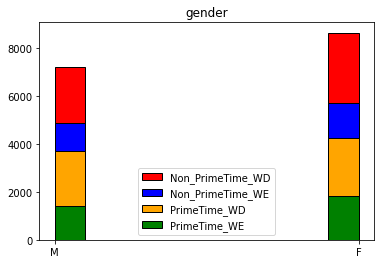

In [ ]:
# dictionary={'Non_PrimeTime_WD':1,'Non_PrimeTime_WE':2,'PrimeTime_WD':3,'PrimeTime_WE':4}
label =df2.columns[4] #'gender' column
plt.hist(df2[df2['daypart']==1][label],color='red',label='Non_PrimeTime_WD', edgecolor='black')
plt.hist(df2[df2['daypart']==2][label],color='blue',label='Non_PrimeTime_WE',edgecolor='black')
plt.hist(df2[df2['daypart']==3][label],color='orange',label='PrimeTime_WD',edgecolor='black')
plt.hist(df2[df2['daypart']==4][label],color='green',label='PrimeTime_WE',edgecolor='black')
plt.title(label)
plt.legend()
plt.show()

#Y axis reflects count of each 'daypart_id' for corresponding 'age_bucket'

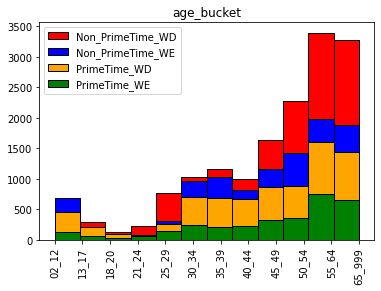

In [ ]:
label =df2.columns[5] #'age_bucket' column

plt.hist(df2[df2['daypart']==1][label],color='red',bins=len(unique_age), label='Non_PrimeTime_WD', edgecolor='black')
plt.hist(df2[df2['daypart']==2][label],color='blue',bins=len(unique_age),label='Non_PrimeTime_WE',edgecolor='black')
plt.hist(df2[df2['daypart']==3][label],color='orange',bins=len(unique_age),label='PrimeTime_WD', edgecolor='black')
plt.hist(df2[df2['daypart']==4][label],color='green',bins=len(unique_age),label='PrimeTime_WE', edgecolor='black')
plt.title(label)
plt.legend()
plt.xticks(rotation=90)
plt.show()

#Y axis reflects total count of each corresponding 'age_bucket'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

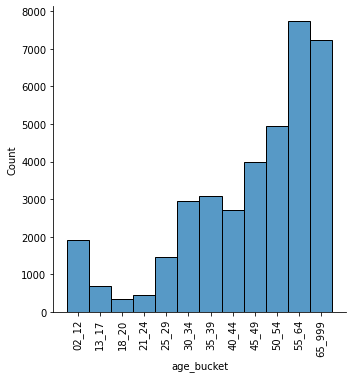

In [ ]:
sns.displot(df2, x="age_bucket")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

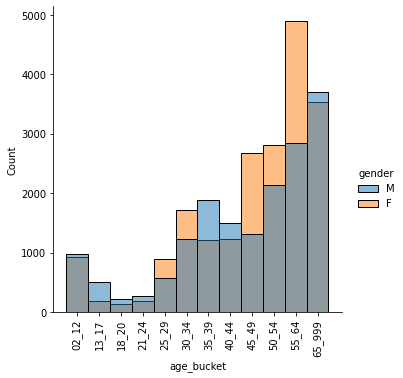

In [ ]:
sns.displot(df2, x="age_bucket", hue='gender')
plt.xticks(rotation=90)

Some observations:

1.   Audiences age from 02-12 are more likely to veiw at Non_PrimeTime_WE, while other age groups are more likely to view at Non_PrimeTime_WD
2.   Across all age groups, PrimeTime_WE have the least audiences



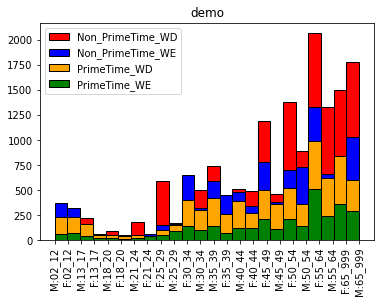

In [ ]:
label =df2.columns[6] #'demo' column
plt.hist(df2[df2['daypart']==1][label],color='red',bins=2*len(unique_age),label='Non_PrimeTime_WD', edgecolor='black')
plt.hist(df2[df2['daypart']==2][label],color='blue',bins=2*len(unique_age),label='Non_PrimeTime_WE',edgecolor='black')
plt.hist(df2[df2['daypart']==3][label],color='orange',bins=2*len(unique_age),label='PrimeTime_WD',edgecolor='black')
plt.hist(df2[df2['daypart']==4][label],color='green',bins=2*len(unique_age),label='PrimeTime_WE',edgecolor='black')
plt.title(label)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2.device_type.unique()

array(['Fire OS', 'Android'], dtype=object)

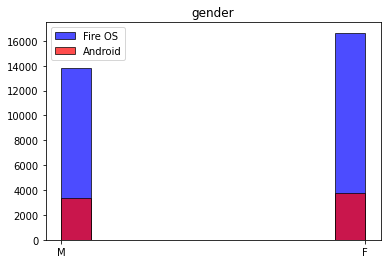

In [ ]:
label =df2.columns[4]
plt.hist(df2[df2['device_id']==1][label],color='blue',label='Fire OS',edgecolor='black',alpha=0.7)
plt.hist(df2[df2['device_id']==0][label],color='red',label='Android',edgecolor='black',alpha=0.7)
plt.title(label)
plt.legend()
plt.show()

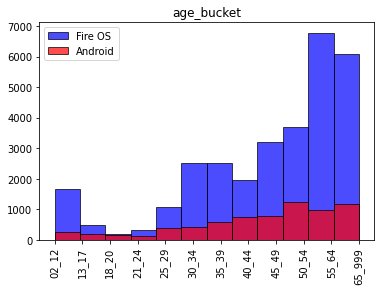

In [ ]:
label =df2.columns[5]
plt.hist(df2[df2['device_id']==1][label],color='blue',bins=len(unique_age),label='Fire OS',edgecolor='black',alpha=0.7)
plt.hist(df2[df2['device_id']==0][label],color='red',bins=len(unique_age),label='Android',edgecolor='black',alpha=0.7)
plt.title(label)
plt.legend()
plt.xticks(rotation=90)
plt.show()

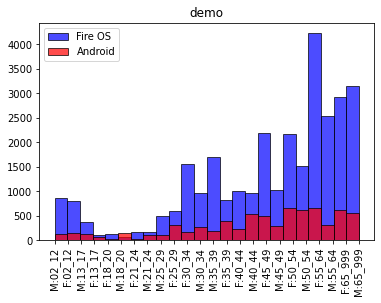

In [ ]:

label =df2.columns[6]
plt.hist(df2[df2['device_id']==1][label],color='blue',bins=2*len(unique_age),label='Fire OS',edgecolor='black',alpha=0.7)
plt.hist(df2[df2['device_id']==0][label],color='red',bins=2*len(unique_age),label='Android',edgecolor='black',alpha=0.7)
plt.title(label)
plt.legend()
plt.xticks(rotation=90)
plt.show()

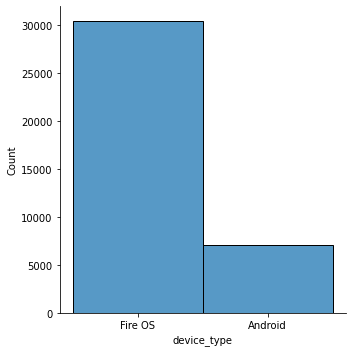

In [ ]:
sns.displot(df2, x="device_type")


#Observations:
*   It's interesting to see only two 'device_type', Apple iOS device is not in the dataset provided.

*   More viewing events occurred through Fire OS device than Android device in general, approximately View Count Fire OS:Android=4:1, this trend is constant on gender differences and age differences


*   More Female than Male audiences on both device_type 









#Q2 Extract the categories from individual features



*   'device_type' feature only has 2 categories: Fire OS and Anrdoid

*   'daypart_id' feature has 4 categories: Non_PrimeTime_WD,Non_PrimeTime_WE, PrimeTime_WD, PrimeTime_WE

*   'age_bucket' feature has 12 categories: ['02_12' '13_17' '18_20' '21_24' '25_29' '30_34' '35_39' '40_44' '45_49'
 '50_54' '55_64' '65_999']


*   'demo' feature is concatenation of age and gender so 24 Features, so 24 categories: ['F:02_12' 'F:13_17' 'F:18_20' 'F:21_24' 'F:25_29' 'F:30_34' 'F:35_39' 'F:40_44' 'F:45_49'
 'F:50_54' 'F:55_64' 'F:65_999' 'M:02_12' 'M:13_17' 'M:18_20' 'M:21_24' 'M:25_29' 'M:30_34' 'M:35_39' 'M:40_44' 'M:45_49'
 'M:50_54' 'M:55_64' 'M:65_999']


*   'genre_id' feature has 11 categories, each number maybe denoted to one genre type
*   'chanel_id' feature only has 1 category, which is also the same across the CSV, thus the 'chanel_id' column may be dropped during modelling, since all rows contain the same 'chanel_id'

*   Though 'household_id' and 'person_id' are numerical datatype in the CSV, but they are assigned ID for the household that viewed the id and assigned ID for the person within the household who viewed the id, these numbers should be considered as categorical variables as well
*   'race' feature has 11 categories,['White', 'Black', 'Asian Indian', 'Filipino', 'American Indian',
'Chinese', 'Japanese', 'Other', 'Korean', 'Vietnamese', 'Hawaiian'],
 dtype=object)








 
(some code has been reflected earlier)






In [ ]:
df2.genre_id.unique()

array([ 5,  3,  4,  7, 16, 13, 15, 10, 14,  0, 17])

In [ ]:
df2.channel_id.unique()

array([2])

In [ ]:
df2.race.unique()

array(['White', 'Black', 'American Indian', 'Filipino', 'Chinese',
       'Asian Indian', 'Japanese', 'Other', 'Korean', 'Vietnamese',
       'Hawaiian'], dtype=object)

In [ ]:
df2['device_type'].value_counts()

Fire OS    30451
Android     7074
Name: device_type, dtype: int64

In [ ]:
df2['device_type'].describe()

count       37525
unique          2
top       Fire OS
freq        30451
Name: device_type, dtype: object

# Q2 Which features may be important in a clustering model:

Clustering models focus on identifying groups of similar records and labeling the records according to the group to which they belong.
*   People of the same 'gender' may have the similar hobbies 

*   People in the same 'age_bucket' may show similar activities they tend to enjoy. 
*   People in the same 'household' may like the same content, as they are in the same family

*  People of the same 'race' may like the same content

*   People who have viewed the same 'genre_id' may like to view similar contents





# Q3 Clustering model
I used Kmeans Cluster before, but Kmeans is more suitable for numerical dataset. The CSV here is majorly categorical data, thus I decided to use K modes to map the data, K modes is more suitable for categorical data.
KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar the data points are. Centroids are updated by Means.
But for categorical data points,there is no way to calculate the distance. KModes algorithm uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar the data points. 
# Feature Selection
'data_date' and 'utc_time'is the date,time when viewing event occured, these two features can be replaced by the 'daypart_id' column, where we don't need the specific time the event occured, but we count the time/date toward a broader time frame of whether it is PrimeTime, whether it is Weekdays or Weekends.
'daypart' and 'device_id' are two columns I created for encoding, also dropped

In [ ]:
df2.head()

,data_date,utc_time,household_id,person_id,gender,age_bucket,demo,race,channel_id,device_type,genre_id,daypart_id,daypart,device_id
10286,12/13/2021,12/13/2021 23:12,282,666,M,02_12,M:02_12,White,2,Fire OS,0,Non_PrimeTime_WD,1,1
5122,12/5/2021,12/5/2021 17:31,41,787,M,02_12,M:02_12,White,2,Fire OS,16,Non_PrimeTime_WE,2,1
18498,12/2/2021,12/2/2021 8:42,221,554,F,02_12,F:02_12,White,2,Fire OS,5,Non_PrimeTime_WD,1,1
8348,12/11/2021,12/11/2021 23:22,332,785,M,02_12,M:02_12,White,2,Fire OS,5,Non_PrimeTime_WE,2,1
18487,12/8/2021,12/8/2021 17:51,142,128,F,02_12,F:02_12,Black,2,Fire OS,16,Non_PrimeTime_WD,1,1


In [ ]:
df3=df2.drop(['data_date','utc_time','daypart','device_id'], axis=1)

#For this specific dataset,'chanel_id' can also be dropped since it is '2' for all rows, but I decided to keep it here as if in the future when we have other dataset with different 'chanel_id' we can still use the same code

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Elbow curve is used to find the optimal K
Target is age_bucket, where we have seen 12 different age groups, try K(number of centeriods) from 1 to 12 should be enough

The k-modes algorithm uses a simple matching dissimilarity measure
to deal with categorical objects, replaces the means of clusters(for numerical data) with modes, and uses a frequency-based method to
update modes in the clustering process to minimize the clustering cost function. With these extensions the k-modes
algorithm enables the clustering of categorical data in a fashion similar to k-means. 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 216980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 216980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 216980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 216980.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1477, cost: 209310.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13084, cost: 193724.0
Run 2, iteration: 2/100, moves: 1091, cost: 193724.0
Init: in

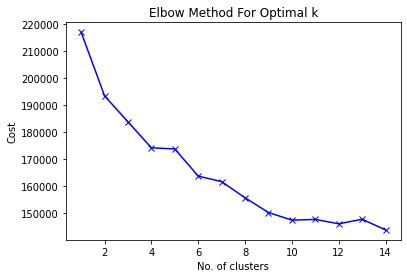

In [ ]:
# reduce the K range and reduce the n_init number can significantly reduce the time to plot the Elbow Curve
# n_init default is 10, which will take very long for generating the Elbow Curve, use n_init=5 will save time when selecting the optimal K
cost = []
K = range(1,15)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init=5, verbose=1)
    kmode.fit_predict(df3)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# K modes Parameters explained

    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.

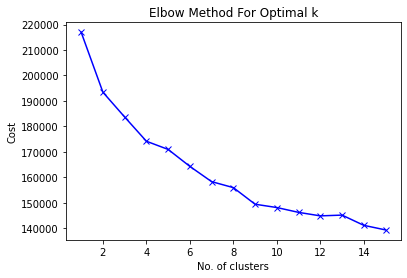

# K=10 to 12 showed a plateau on the Elbow Curve, assign K to 12 may take a longer time for compute, but may be more aligned with the 'age_bucket' column as there are 12 age groups.
# We can also assign K=10 and build a second K modes model to see the differences between these two K modes model. 

In [ ]:
kmode = KModes(n_clusters=12, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df3)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7340, cost: 148800.0
Run 1, iteration: 2/100, moves: 2949, cost: 148749.0
Run 1, iteration: 3/100, moves: 108, cost: 148749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10823, cost: 147882.0
Run 2, iteration: 2/100, moves: 2882, cost: 147113.0
Run 2, iteration: 3/100, moves: 289, cost: 147113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6771, cost: 154833.0
Run 3, iteration: 2/100, moves: 3519, cost: 152034.0
Run 3, iteration: 3/100, moves: 1693, cost: 151892.0
Run 3, iteration: 4/100, moves: 1570, cost: 151123.0
Run 3, iteration: 5/100, moves: 283, cost: 151123.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8661, cost: 151830.0
Run 4, iteration: 2/100, moves: 9592, cost: 15

array([3, 3, 0, ..., 4, 5, 4], dtype=uint16)

In [ ]:
df3.insert(0, "Cluster", clusters, True)
df3

,Cluster,household_id,person_id,gender,age_bucket,demo,race,channel_id,device_type,genre_id,daypart_id
10286,3,282,666,M,02_12,M:02_12,White,2,Fire OS,0,Non_PrimeTime_WD
5122,3,41,787,M,02_12,M:02_12,White,2,Fire OS,16,Non_PrimeTime_WE
18498,0,221,554,F,02_12,F:02_12,White,2,Fire OS,5,Non_PrimeTime_WD
8348,3,332,785,M,02_12,M:02_12,White,2,Fire OS,5,Non_PrimeTime_WE
18487,2,142,128,F,02_12,F:02_12,Black,2,Fire OS,16,Non_PrimeTime_WD
...,...,...,...,...,...,...,...,...,...,...,...
35862,4,309,610,M,65_999,M:65_999,White,2,Android,14,Non_PrimeTime_WD
35857,4,91,599,M,65_999,M:65_999,Japanese,2,Fire OS,14,Non_PrimeTime_WD
35853,4,95,585,M,65_999,M:65_999,White,2,Fire OS,13,PrimeTime_WD
33572,5,131,432,F,65_999,F:65_999,White,2,Android,4,PrimeTime_WD


# Conclusion:
A K modes model is used to cluster Ads viewing on different platform, 12 clusters were selected to group different ads viewing events. Features such as 'gender','age',view_time, 'race','house_id','person_id' are used to make the cluster model. 

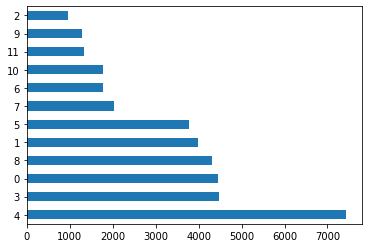

In [ ]:
df3['Cluster'].value_counts().plot(kind='barh')
# The distribution of each clusters is reflected below

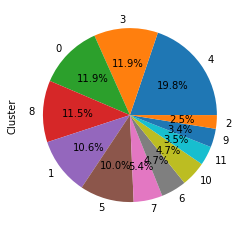

In [ ]:
df3['Cluster'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=10)

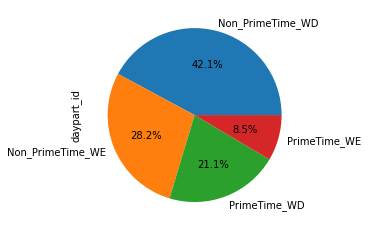

In [ ]:
df3['daypart_id'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=10)

Text(0, 0.5, 'age_bucket')

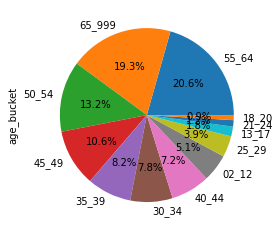

In [ ]:
df3['age_bucket'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=10)
plt.ylabel("age_bucket", labelpad=20)


In [ ]:
df4=df3[df3["Cluster"]==4]
df4.tail(5)

,Cluster,household_id,person_id,gender,age_bucket,demo,race,channel_id,device_type,genre_id,daypart_id
19243,4,229,501,M,65_999,M:65_999,White,2,Fire OS,14,Non_PrimeTime_WD
35862,4,309,610,M,65_999,M:65_999,White,2,Android,14,Non_PrimeTime_WD
35857,4,91,599,M,65_999,M:65_999,Japanese,2,Fire OS,14,Non_PrimeTime_WD
35853,4,95,585,M,65_999,M:65_999,White,2,Fire OS,13,PrimeTime_WD
11099,4,166,435,M,65_999,M:65_999,White,2,Fire OS,3,Non_PrimeTime_WD


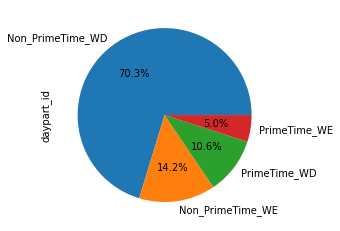

In [ ]:
df4['daypart_id'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=10)

Text(0, 0.5, 'age_bucket')

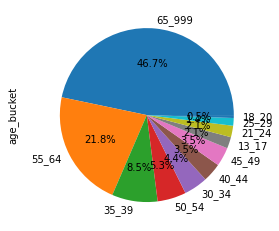

In [ ]:
df4['age_bucket'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',fontsize=10)
plt.ylabel("age_bucket", labelpad=20)


In [ ]:
groupby_age = df3.groupby(["Cluster"]).age_bucket.value_counts(normalize=True)
groupby_age

Cluster  age_bucket
0        50_54        0.509
         40_44        0.144
         45_49        0.120
         25_29        0.066
         35_39        0.043
         02_12        0.040
         30_34        0.028
         13_17        0.022
         18_20        0.016
         65_999       0.005
         21_24        0.004
         55_64        0.003
1        45_49        0.637
         40_44        0.118
         02_12        0.052
         35_39        0.044
         50_54        0.040
         13_17        0.025
         65_999       0.025
         55_64        0.021
         21_24        0.017
         25_29        0.013
         18_20        0.008
         30_34        0.001
2        25_29        0.697
         40_44        0.098
         02_12        0.079
         21_24        0.065
         50_54        0.020
         35_39        0.019
         18_20        0.008
         55_64        0.006
         13_17        0.005
         30_34        0.001
         45_49        0.001


In [ ]:
groupby_gender = df3.groupby(["Cluster"]).gender.value_counts(normalize=True)
groupby_gender

Cluster  gender
0        F        0.705
         M        0.295
1        F        0.819
         M        0.181
2        F        0.773
         M        0.227
3        M        0.952
         F        0.048
4        M        1.000
5        F        1.000
6        F        0.861
         M        0.139
7        M        0.808
         F        0.192
8        F        1.000
9        F        0.917
         M        0.083
10       F        0.943
         M        0.057
11       M        0.845
         F        0.155
Name: gender, dtype: float64

In [ ]:
groupby_daypart = df3.groupby(["Cluster"]).daypart_id.value_counts(normalize=True)
groupby_daypart

Cluster  daypart_id      
0        Non_PrimeTime_WD   0.652
         Non_PrimeTime_WE   0.150
         PrimeTime_WD       0.125
         PrimeTime_WE       0.074
1        PrimeTime_WD       0.489
         Non_PrimeTime_WD   0.254
         Non_PrimeTime_WE   0.168
         PrimeTime_WE       0.088
2        Non_PrimeTime_WD   0.711
         Non_PrimeTime_WE   0.119
         PrimeTime_WE       0.106
         PrimeTime_WD       0.064
3        Non_PrimeTime_WE   0.556
         PrimeTime_WD       0.186
         Non_PrimeTime_WD   0.157
         PrimeTime_WE       0.101
4        Non_PrimeTime_WD   0.703
         Non_PrimeTime_WE   0.142
         PrimeTime_WD       0.106
         PrimeTime_WE       0.050
5        Non_PrimeTime_WD   0.482
         Non_PrimeTime_WE   0.229
         PrimeTime_WD       0.196
         PrimeTime_WE       0.093
6        Non_PrimeTime_WE   0.643
         Non_PrimeTime_WD   0.229
         PrimeTime_WD       0.070
         PrimeTime_WE       0.059
7        Non_PrimeTime

#Q4 When it will be a good idea to combine categories within a feature?
Such as combine Primetime_WE and Primetime_WD into Primetime 

When can it benefit the model?

When can it harm the model?



Whether to combine categories depends on what insights we want to pull out of the dataset. 

*   If we want to see the differeces between Primetime View Count and Non_Primetime View Count, aggregate Primetime_WE with Primetime_WD to Primetime, and aggregate Non_Primetime_WE with Non_Primetime_WD to Non_Primetime would be a good idea.
*   If we want to see the differeces between Weekday View Count and Weekend View Count, aggregate Primetime_WE with Non_Primetime_WE to WE(Weekend), and aggregate Primetime_WD with Non_Primetime_WD to WD(Weekday) would be a good idea.

*   Combining all 4 categories together may not help, as there will be no difference between datapoints

*  If certain groups behave the same way or to some extend similar, combing them together will be beneficial, such as combine age 2-12 with age 13-24 together as age 2-25, this may reduce the model complexity, reduce computing time and  reduce the chance of overfit.


*   However, combing categories may also yield a risk of higher error rate and model underfit. Information between differnt categories may be lost as well.









#Further thoughts:

During building the K modes model, there is no way for me to use the result from K modes to make a predicton, maybe we can try to train a classifier model on the clustered data. Then use the classifier to predict on the new data. A KNN model can be used after labelling the data. This idea is generated based on the following paper
[Combining supervised and unsupervised machine learning algorithms to predict the learners’ learning styles](https://www.sciencedirect.com/science/article/pii/S1877050919300122?ref=pdf_download&fr=RR-2&rr=72399cf68c2e304d)

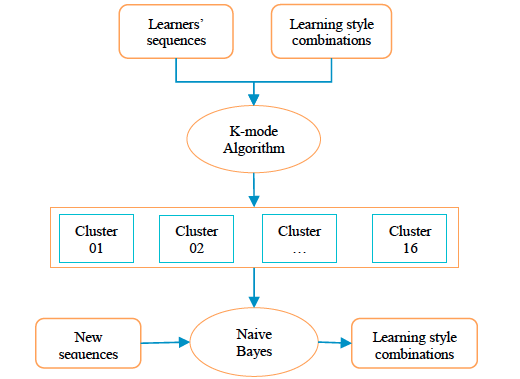